In [2]:
from IPython.display import display,HTML
display(HTML("<style>.container {width:95% !important ; }</style>"))

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as smf

# ADP 27회 실기 문제

# 문제설명 (1번)
- 데이터 url :https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/rauds.csv    
- 출처 :https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud (후처리)    
신용카드 사용에 대한 데이터이다. 각 컬럼의 의미는 다음과 같다.    
Time : 카드 이용 시점의 시각 (sec)    
V1 ~ V17 : 유저 특성에 관한 피쳐 (float)    
Amount : 거래금액    
Class : 0: 정상거래 , 1: 이상거래

In [4]:
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/rauds.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,23.0,1.173285,0.353498,0.283905,1.133563,-0.172577,-0.916054,0.369025,-0.327260,-0.246651,...,0.067003,0.227812,-0.150487,0.435045,0.724825,-0.337082,0.016368,0.030041,41.88,0
1,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
2,36.0,1.095525,-0.116085,1.397912,1.497547,-1.049124,0.072839,-0.723802,0.287532,0.996327,...,-0.033234,0.093262,0.089498,0.361261,0.250963,-0.378280,0.081024,0.034227,2.09,0
3,39.0,-1.330882,0.267540,-0.168470,-0.701232,3.281972,3.216390,-0.059394,0.895430,-0.017779,...,-0.151042,-0.311726,-0.374793,1.014886,0.353992,-0.510327,0.159033,0.228708,13.84,0
4,42.0,-0.249361,0.399227,0.068009,-1.060619,2.410399,3.736574,0.316446,0.672296,0.015140,...,-0.257663,-0.616762,-0.156669,1.031135,0.120617,0.310494,-0.288299,-0.223964,32.51,0


## 문제 1-1 
EDA 데이터 탐색 (시각화 포함)

In [5]:
df.shape

(5900, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5900 non-null   float64
 1   V1      5900 non-null   float64
 2   V2      5900 non-null   float64
 3   V3      5900 non-null   float64
 4   V4      5900 non-null   float64
 5   V5      5900 non-null   float64
 6   V6      5900 non-null   float64
 7   V7      5900 non-null   float64
 8   V8      5900 non-null   float64
 9   V9      5900 non-null   float64
 10  V10     5900 non-null   float64
 11  V11     5900 non-null   float64
 12  V12     5900 non-null   float64
 13  V13     5900 non-null   float64
 14  V14     5900 non-null   float64
 15  V15     5900 non-null   float64
 16  V16     5900 non-null   float64
 17  V17     5900 non-null   float64
 18  V18     5900 non-null   float64
 19  V19     5900 non-null   float64
 20  V20     5900 non-null   float64
 21  V21     5900 non-null   float64
 22  

In [8]:
print('<답안>')
print('데이터의 총 개수는 5,900, 총 변수의 개수는 종속변수를 포함하여 31개이다. 그리고 NA 값은 존재하지 않는다. 종속 변수를 제외한 모든 변수는 수치형 변수로 구성되어 있으므로, boxplot을 통해 이상치 유무를 확인한다.')

<답안>
데이터의 총 개수는 5,900, 총 변수의 개수는 종속변수를 포함하여 31개이다. 그리고 NA 값은 존재하지 않는다. 종속 변수를 제외한 모든 변수는 수치형 변수로 구성되어 있으므로, boxplot을 통해 이상치 유무를 확인한다.


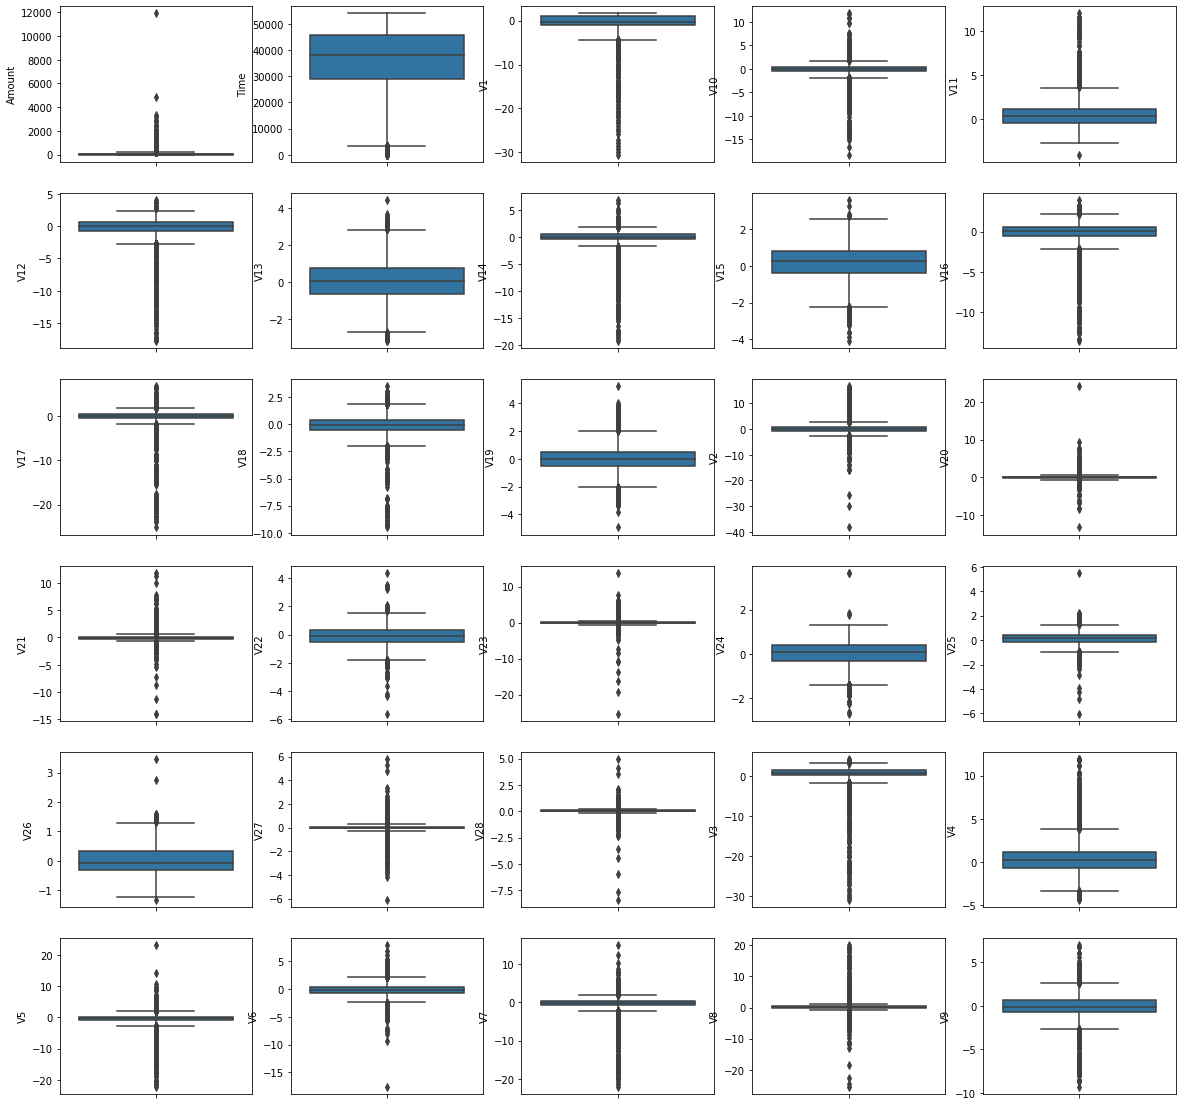

In [9]:
fig, axes = plt.subplots(nrows=6, ncols=len(df.columns)//6, figsize=(20, 20))
for i, col in enumerate(df.columns.difference(['Class'])):
    row_ = i//5
    col_ = i%5
    sns.boxplot(y=df[col], ax=axes[row_][col_])

In [10]:
print('Boxplot을 확인해 본 결과, Time을 제외한 모든 변수에서 이상치가 발견되었으며, 각 변수의 scale이 다름을 확인할 수 있다. 이는 모델링을 수행할 때 변수 변환과 scaling이 필요할 수 있음을 시사한다.')
print('Target Class의 경우 이진 변수이므로, barplot으로 아래와 같이 확인하였다.')

Boxplot을 확인해 본 결과, Time을 제외한 모든 변수에서 이상치가 발견되었으며, 각 변수의 scale이 다름을 확인할 수 있다. 이는 모델링을 수행할 때 변수 변환과 scaling이 필요할 수 있음을 시사한다.
Target Class의 경우 이진 변수이므로, barplot으로 아래와 같이 확인하였다.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

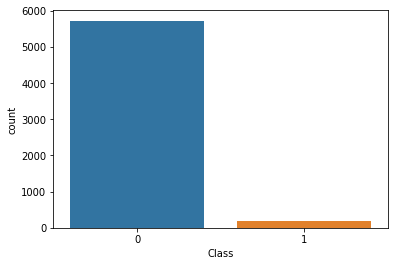

In [12]:
sns.countplot(df.Class)

In [14]:
print('Class 변수는 0이 5723건, 1이 177건으로 데이터 불균형이 존재한다. 데이터 불균형을 해소하기 위한 작업이 추후 필요하다.')
df.Class.value_counts()

Class 변수는 0이 5723건, 1이 177건으로 데이터 불균형이 존재한다. 데이터 불균형을 해소하기 위한 작업이 추후 필요하다.


0    5723
1     177
Name: Class, dtype: int64

## 문제 1-2 
변수간 상관관계를 시각화하고 전처리가 필요하다면 그 이유를 설명하고 시행하라

<답안>
변수 간 Pearson 상관계수를 시각화해 보니, 선형 관계가 다수 있음이 발견되었다. 상관관계가 높은 변수는 모델링 수행 시 모델의 성능을 저하시키는 요소이므로, 변수 선택이나 차원 축소를 통해 필요한 변수만 추출해 내는 것이 필요하다.


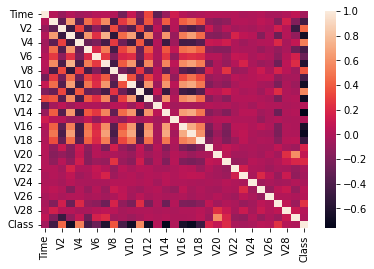

In [15]:
sns.heatmap(df.corr())
print('<답안>')
print('변수 간 Pearson 상관계수를 시각화해 보니, 선형 관계가 다수 있음이 발견되었다. 상관관계가 높은 변수는 모델링 수행 시 모델의 성능을 저하시키는 요소이므로, 변수 선택이나 차원 축소를 통해 필요한 변수만 추출해 내는 것이 필요하다.')

In [30]:
print('차원 축소 전 필요한 전처리로는 변수 간 scaling을 통일이 있다.')
print('변수의 의미를 현재로써는 정확하게 알기 어렵기 때문에, 이상치 제거 작업은 불가능하므로 이상치의 영향을 줄이는 작업을 진행한다.')
print('log 변수변환을 먼저 수행하고, 이상치의 영향을 덜 받는 RobustScaler로 scaling을 수행한다.')
print('작업 수행 후, 이상 정도가 완화된 것과 scale이 통일된것을 확인하였다.')

차원 축소 전 필요한 전처리로는 변수 간 scaling을 통일이 있다.
변수의 의미를 현재로써는 정확하게 알기 어렵기 때문에, 이상치 제거 작업은 불가능하므로 이상치의 영향을 줄이는 작업을 진행한다.
log 변수변환을 먼저 수행하고, 이상치의 영향을 덜 받는 RobustScaler로 scaling을 수행한다.
작업 수행 후, 이상 정도가 완화된 것과 scale이 통일된것을 확인하였다.


In [23]:
from sklearn.preprocessing import RobustScaler

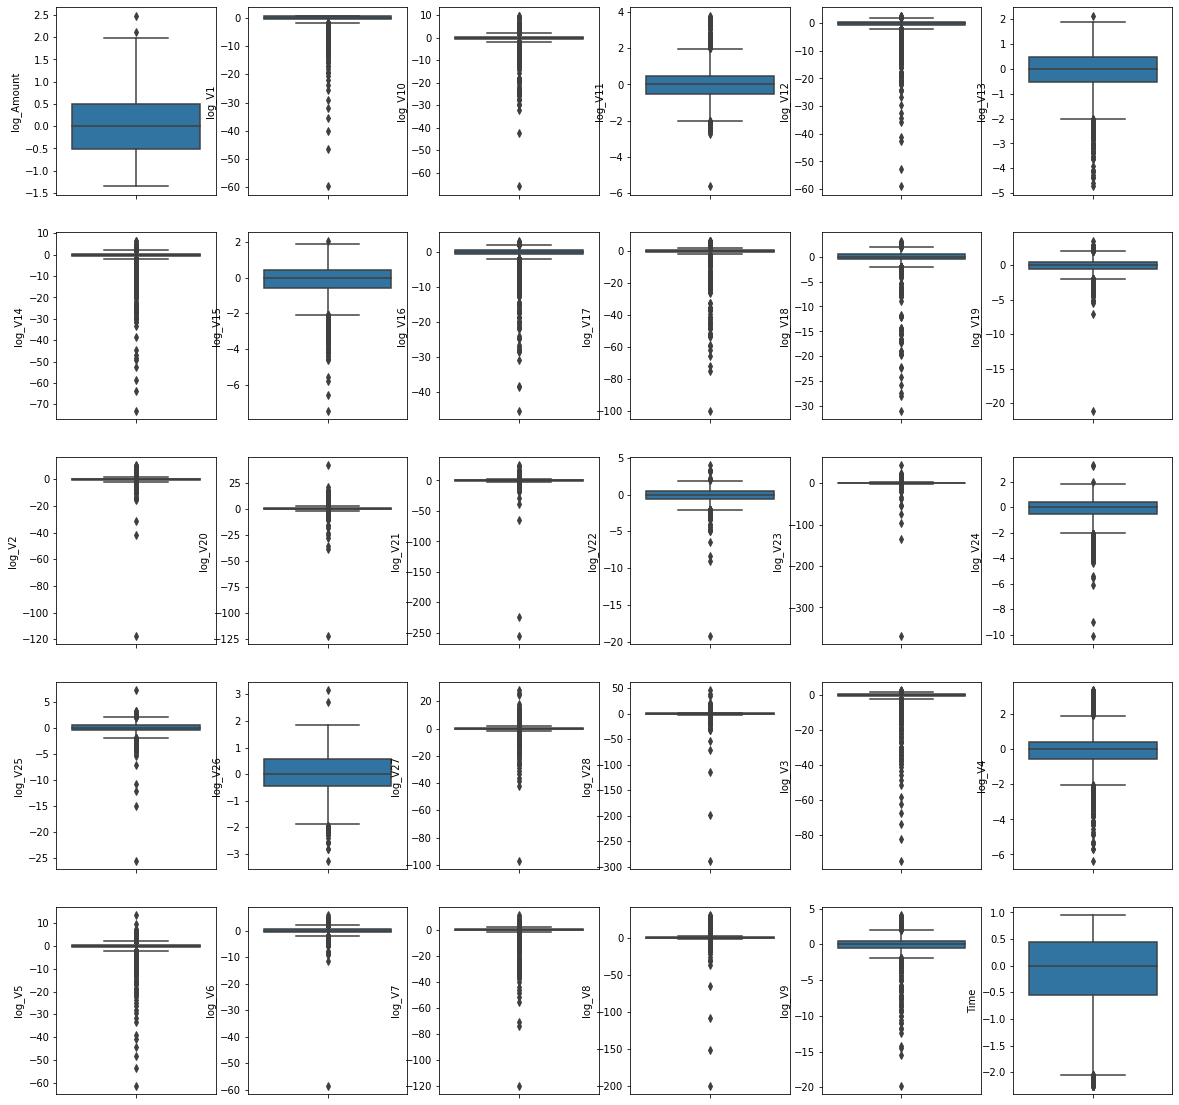

In [33]:
log_columns = df.columns.difference(['Class', 'Time'])

new_df = pd.DataFrame()
for col in log_columns:
    new_df['log_' + col] = np.log1p(df[col] + abs(int(np.min(df[col])))) # 최소값의 절대값을 더해서 0 이상의 값으로 만듦

new_df['Time'] = df['Time']

scaler = RobustScaler()
x = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)

fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 20))
for i, col in enumerate(x_scaled.columns):
    row_ = i//6
    col_ = i%6
    sns.boxplot(y=x[col], ax=axes[row_][col_])

## 문제 2.1 
차원축소 방법 2가지 이상에 대해 설명하고 장단점을 비교하라

In [16]:
print('차원 축소는 Sparsity를 줄이고, 모델 설명력을 높이기 위한 방법이며, 데이터를 더 잘 설명할 수 있는 잠재적인 요소를 추출하여 데이터의 차원을 감소시키는 방법론이다.')
print('많이 사용되는 차원축소 방법으로 주성분분석과 요인분석이 있다. 두 방법 모두 적은 변수 개수로 전체 데이터의 분산 설명력을 최대화하는 데에 그 목적이 있다.')
print('주성분 분석은 자료의 변동이 최대한 보존되는 축을 찾고, 이를 바탕으로 저차원 자료를 생성한다. SVD 알고리즘 기반으로 구현된다.')
print('요인 분석은 유사한 변수를 묶어 공동 요인을 만들고, 이를 이용하여 변수의 상관 구조를 분석한다. Clustering과 유사한 성격을 띄나, 공동 요인을 만드는 데 분석가의 사전 지식이 어느 정도 필요하다.')

차원 축소는 Sparsity를 줄이고, 모델 설명력을 높이기 위한 방법이며, 데이터를 더 잘 설명할 수 있는 잠재적인 요소를 추출하여 데이터의 차원을 감소시키는 방법론이다.
많이 사용되는 차원축소 방법으로 주성분분석과 요인분석이 있다. 두 방법 모두 적은 변수 개수로 전체 데이터의 분산 설명력을 최대화하는 데에 그 목적이 있다.
주성분 분석은 자료의 변동이 최대한 보존되는 축을 찾고, 이를 바탕으로 저차원 자료를 생성한다. SVD 알고리즘 기반으로 구현된다.
요인 분석은 유사한 변수를 묶어 공동 요인을 만들고, 이를 이용하여 변수의 상관 구조를 분석한다. Clustering과 유사한 성격을 띄나, 공동 요인을 만드는 데 분석가의 사전 지식이 어느 정도 필요하다.


## 문제 2.2
2.1에서 선택한 한가지 차원축소 방법을 실제로 수행하고 선택한 이유를 설명하라

In [31]:
print('본 케이스에서는 데이터와 변수에 대한 상세 정보가 부족하기 때문에, 요인분석보다는 주성분분석이 보다 더 적합한 것으로 판단된다.')

본 케이스에서는 데이터와 변수에 대한 상세 정보가 부족하기 때문에, 요인분석보다는 주성분분석이 보다 더 적합한 것으로 판단된다.


In [32]:
from sklearn.decomposition import PCA

In [34]:
# 주성분 추출
pca = PCA(n_components=len(df.columns.difference(['Class'])))
pca_fit = pca.fit(x)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값 :  [618.31061741 467.9749416  460.68327199 426.50358027 292.05510072
 235.7905213  195.89842832 169.71250186 163.07893382 150.59118598
 132.45132169 106.19827775  96.34969823  91.10230087  87.58051281
  74.53510461  73.63592664  71.53656659  70.50525293  69.15854626
  67.51934252  64.9372257   62.69566361  59.97862798  58.13290068
  53.73170361  48.94913035  45.85346121  43.05464057  40.63828186]
분산 설명력:  [0.28043143 0.16064177 0.15567475 0.13343159 0.06256665 0.04078176
 0.02814979 0.02112715 0.01950783 0.0166346  0.01286844 0.00827272
 0.00680948 0.00608796 0.00562637 0.00407507 0.00397734 0.00375379
 0.00364633 0.00350837 0.00334403 0.00309315 0.00288329 0.0026388
 0.00247889 0.00211775 0.00175753 0.00154226 0.00135973 0.00121139]


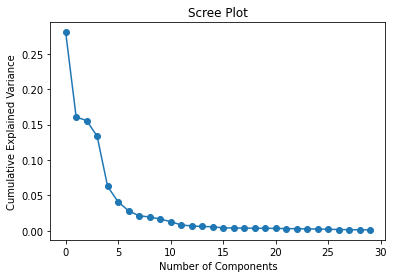

In [35]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

In [39]:
pca.explained_variance_ratio_[:5].sum()

0.7927461814120831

In [40]:
# 주성분 추출
pca = PCA(n_components=5)
transformed = pd.DataFrame(pca.fit_transform(x), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
# transformed['Class'] = df['Class'] # Y label 추가

In [41]:
transformed

,PC1,PC2,PC3,PC4,PC5
0,-1.041600,-0.142468,0.132784,0.466115,-0.333347
1,-1.148282,-0.462528,0.740366,0.260522,-0.764370
2,-0.849061,-0.758795,-0.003171,-0.172197,0.065418
3,-0.372320,-1.570797,0.494475,2.463479,-0.397714
4,-0.777451,1.108538,1.497626,-1.896103,-0.793494
...,...,...,...,...,...
5895,-0.476945,-0.989630,0.679913,1.747873,0.474247
5896,-1.293190,-0.536077,-0.840031,0.634907,-0.554172
5897,-0.604448,-0.007294,-0.055079,0.162338,-0.050924
5898,-0.674313,-1.597950,-0.206964,-0.896077,-0.066258


In [42]:
print(f'5개의 주성분이 {round(pca.explained_variance_ratio_[:5].sum() ,2)}%의 분산을 설명하고, 주성분이 더 늘어나도 큰 설명력 차이가 발생하지 않는다. 따라서 주성분 5개로 PCA 차원 축소를 진행한다.')
print('차원 축소 진행 후 총 5개의 변수로 변환된 것을 확인할 수 있다.')

5개의 주성분이 0.79%의 분산을 설명하고, 주성분이 더 늘어나도 큰 설명력 차이가 발생하지 않는다. 따라서 주성분 5개로 PCA 차원 축소를 진행한다.
차원 축소 진행 후 총 5개의 변수로 변환된 것을 확인할 수 있다.


## 문제 3.1
오버샘플링과 언더샘플링에 대한 설명 및 장단점을 설명하라

In [43]:
print('해당 데이터는 Target data인 Class 변수의 비율에 차이가 있기 때문에, sampling 방법을 통한 클래스 비율 조정이 필수적이다.')
print('Under-sampling은 모델 수행 속도가 빨라진다는 장점이 있으나, 적은 class 개수에 데이터를 맞추기 때문에 데이터 개수가 크게 줄 수 있고, 이로 인한 성능 저하를 주의해야 한다.')
print('Over-sampling은 적은 class를 많은 class 개수에 맞게 sampling하여 생성하는 방법으로, Under sampling보다 성능에 유리하나, 동일 데이터를 재성성하는 것으므로 Overfitting 가능성이 있다.')

해당 데이터는 Target data인 Class 변수의 비율에 차이가 있기 때문에, sampling 방법을 통한 클래스 비율 조정이 필수적이다.
Under-sampling은 모델 수행 속도가 빨라진다는 장점이 있으나, 적은 class 개수에 데이터를 맞추기 때문에 데이터 개수가 크게 줄 수 있고, 이로 인한 성능 저하를 주의해야 한다.
Over-sampling은 적은 class를 많은 class 개수에 맞게 sampling하여 생성하는 방법으로, Under sampling보다 성능에 유리하나, 동일 데이터를 재성성하는 것으므로 Overfitting 가능성이 있다.


## 문제 3.2 
오버샘플링 및 언더샘플링 방식 중 하나를 선택하여 구현하고 Class를 종속변수로 하는 분류 모델을 2가지 이상 구현하고 성능을 비교하라

In [47]:
print('본 케이스의 경우 데이터의 개수가 많지 않아 Under Sampling을 진행하면 모델의 대표성을 보장하기 어렵다.')
print('따라서 Overfitting만 주의한다면 좋은 모델링 결과를 얻을 수 있는 Over sampling을 선정하여 진행하였다.')
print('Sampling은 train data에 대해서만 진행해야 하므로, data를 8:2 비율로 train set과 test set으로 분리하였다.')

본 케이스의 경우 데이터의 개수가 많지 않아 Under Sampling을 진행하면 모델의 대표성을 보장하기 어렵다.
따라서 Overfitting만 주의한다면 좋은 모델링 결과를 얻을 수 있는 Over sampling을 선정하여 진행하였다.
Sampling은 train data에 대해서만 진행해야 하므로, data를 8:2 비율로 train set과 test set으로 분리하였다.


In [48]:
from collections import Counter
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [51]:
x = transformed
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train)
print(Counter(y_smote))

Counter({0: 4578, 1: 4578})


모든 변수가 연속형 변수로 구성되어 있으므로, K-NN 방법을 이용하여 소수 레이블의 값 사이에 임의의 새로운 데이터를 생성하는 SMOTE 기법을 사용하였다.
두 기법 적용 이후, Class 개수가 4,578개로 맞추어진 것을 확인할 수 있다. 이를 주성분 1, 2로 시각화하면 아래와 같다.


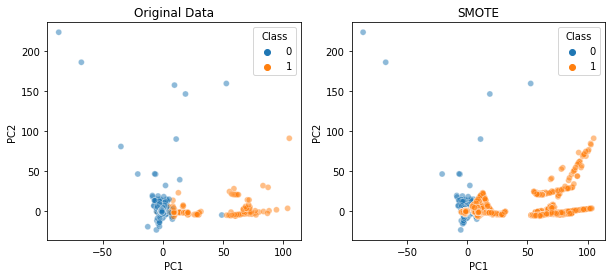

In [53]:
### Sampling Visualization
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

sns.scatterplot(x=x['PC1'], y=x['PC2'], hue=y, ax=axes[0], alpha=0.5)
sns.scatterplot(x=x_smote['PC1'], y=x_smote['PC2'], hue=y_smote, ax=axes[1], alpha=0.5)

axes[0].set_title('Original Data')
axes[1].set_title('SMOTE')

print('모든 변수가 연속형 변수로 구성되어 있으므로, K-NN 방법을 이용하여 소수 레이블의 값 사이에 임의의 새로운 데이터를 생성하는 SMOTE 기법을 사용하였다.')
print('두 기법 적용 이후, Class 개수가 4,578개로 맞추어진 것을 확인할 수 있다. 이를 주성분 1, 2로 시각화하면 아래와 같다.')
plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [84]:
clf = RandomForestClassifier()
lr = LogisticRegression()

train_data_dict = {'RandomForest': clf, 'LogisitcRegression': lr}

evaluation_list = list()
for k, v in train_data_dict.items():
    v.fit(x_smote, y_smote)
    pred = v.predict(x_test)
    cm = confusion_matrix(pred, y_test)
    accu = accuracy_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    print(f'confusion matrix for {k}:\n {cm}')
    print(f'accuracy: {accu}')
    print(f'f1-score: {f1}\n')
    print(classification_report(pred, y_test))
    evaluation_list.append([cm, f1])

confusion matrix for RandomForest:
 [[1136    4]
 [   9   31]]
accuracy: 0.9889830508474576
f1-score: 0.8266666666666667

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1140
           1       0.89      0.78      0.83        40

    accuracy                           0.99      1180
   macro avg       0.94      0.89      0.91      1180
weighted avg       0.99      0.99      0.99      1180

confusion matrix for LogisitcRegression:
 [[1138    4]
 [   7   31]]
accuracy: 0.9906779661016949
f1-score: 0.8493150684931505

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1142
           1       0.89      0.82      0.85        38

    accuracy                           0.99      1180
   macro avg       0.94      0.91      0.92      1180
weighted avg       0.99      0.99      0.99      1180



In [85]:
print('RandomForest와 Logistic Regression 모델을 사용하였다.')
print('두 모델 모두 정확도는 0.99 수준으로 매우 높다.')
print('하지만 데이터 불균형이 있는 모델이므로, Accuracy보다는 F1 score로 모델의 성능을 보는 것이 타당하며,  F1-score는 Logisitc Regression이 0.85로 조금 더 높게 나타났다.')
print('test data에 대해 작성한 Logistic Regression의 혼동 행렬을 확인해 보니 대부분은 Class를 잘 맞추었으며, 11개의 데이터에서 오류가 발생하였다.')
print('케이스를 분석해 보면 4건은 사기가 아닌 거래를 사기로 탐지했고, 7건은 사기 거래를 사기라고 탐지하지 못한 케이스이다.')
print('사기 거래를 사기라고 탐지하지 못 할 경우 그 반대의 경우보다 회사에 더 큰 위험이 발생할 수 있기 때문에, 이를 줄이는 것을 개선 목표로 삼아야 한다.')

RandomForest와 Logistic Regression 모델을 사용하였다.
두 모델 모두 정확도는 0.99 수준으로 매우 높다.
하지만 데이터 불균형이 있는 모델이므로, Accuracy보다는 F1 score로 모델의 성능을 보는 것이 타당하며,  F1-score는 Logisitc Regression이 0.85로 조금 더 높게 나타났다.
test data에 대해 작성한 Logistic Regression의 혼동 행렬을 확인해 보니 대부분은 Class를 잘 맞추었으며, 11개의 데이터에서 오류가 발생하였다.
케이스를 분석해 보면 4건은 사기가 아닌 거래를 사기로 탐지했고, 7건은 사기 거래를 사기라고 탐지하지 못한 케이스이다.
사기 거래를 사기라고 탐지하지 못 할 경우 그 반대의 경우보다 회사에 더 큰 위험이 발생할 수 있기 때문에, 이를 줄이는 것을 개선 목표로 삼아야 한다.


## 문제 4.1 
Class 컬럼이 주어지지 않았다고 가정하고 비지도 학습 방식의 이상탐지 모델을 만들려고한다.     
이상 탐지 모델 2가지 이상 기술하고 장단점을 설명하라

In [86]:
print('이상탐지 모델로 주로 활용하는 기법으로는 Isolation Forest와 DBSCAN 방법이 있다.')
print('Isolation Forest는 Tree 가지치기가 되는 횟수에 따라 이상치 정도를 측정하며, 적은 split에 분류되는 데이터를 이상치로 판단한다. Tree기반 모델이므로 Ourlier의 영향에서 자유롭다.')
print('비지도학습 방법이지만, 가지고 있는 label을 통해 성능을 측정해볼 수도 있다.')
print('이상치 스코어에 따른 적절한 cutoff를 결정해야 한다는 불편한 점이 있으나, 분석가의 입맛에 맞게 cutoff를 결정할 수 있어 이는 모델 결과를 자유롭게 활용할 수 있다는 장점이 되기도 한다.')
print('또 다른 방법은 DBSCAN 알고리즘을 이용하는 것으로, DBSCAN 클러스터링 결과에 따라, 클러스터링이 되지 않은 데이터를 이상치로 판단한다. 클러스터링 알고리즘이므로 직관적으로 이상치와 비이상치를 시각화해볼 수 있으며 알고리즘 특성 상 반달 형태의 군집에 잘 적합한다.')
print('하지만 새로운 데이터의 이상치 예측이 불가하며, DBSCAN알고리즘의 하이퍼 파라미터를 정하는 것이 어렵다는 단점이 있다.')

이상탐지 모델로 주로 활용하는 기법으로는 Isolation Forest와 DBSCAN 방법이 있다.
Isolation Forest는 Tree 가지치기가 되는 횟수에 따라 이상치 정도를 측정하며, 적은 split에 분류되는 데이터를 이상치로 판단한다. Tree기반 모델이므로 Ourlier의 영향에서 자유롭다.
비지도학습 방법이지만, 가지고 있는 label을 통해 성능을 측정해볼 수도 있다.
이상치 스코어에 따른 적절한 cutoff를 결정해야 한다는 불편한 점이 있으나, 분석가의 입맛에 맞게 cutoff를 결정할 수 있어 이는 모델 결과를 자유롭게 활용할 수 있다는 장점이 되기도 한다.
또 다른 방법은 DBSCAN 알고리즘을 이용하는 것으로, DBSCAN 클러스터링 결과에 따라, 클러스터링이 되지 않은 데이터를 이상치로 판단한다. 클러스터링 알고리즘이므로 직관적으로 이상치와 비이상치를 시각화해볼 수 있으며 알고리즘 특성 상 반달 형태의 군집에 잘 적합한다.
하지만 새로운 데이터의 이상치 예측이 불가하며, DBSCAN알고리즘의 하이퍼 파라미터를 정하는 것이 어렵다는 단점이 있다.


## 문제 4.2 
2번에서 만든 데이터로 한 가지 비지도학습 이상탐지 모델을 구현하고, 3번에서 만든 모델과 결과를 비교하라

In [87]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_recall_curve

In [92]:
isol = IsolationForest()
isol.fit(x_smote)

pred = isol.predict(x_test)
pred = np.where(pred == 1, 0, 1)

train_score = isol.score_samples(x_smote)
train_score = -1 * train_score 

precision, recall, thresholds = precision_recall_curve(y_smote, train_score, pos_label=1)
f1 =  2 / (1/precision + 1/recall)

print(f1.max())

0.8505648197955892


/var/folders/cb/__k37xkx4s324t8t_p2bgr4w0000gn/T/ipykernel_75400/3495324848.py:11: RuntimeWarning: divide by zero encountered in true_divide
  f1 =  2 / (1/precision + 1/recall)


In [93]:
print('같은 데이터에 대하여, Isolation Forest 모델을 사용하여 이상치 탐지 모델을 구현하였다. 임의의 파라미터로 학습하여 train data의 이상치 score를 구하고,')
print('F1을 최대화하는 contamination 값을 찾아 다시 학습하였다.')
print('수행 결과, F1 score 0.85로 위에서 수행한 분류 모델 대비 성능이 떨어지는 모델이 도출되었다.')

같은 데이터에 대하여, Isolation Forest 모델을 사용하여 이상치 탐지 모델을 구현하였다. 임의의 파라미터로 학습하여 train data의 이상치 score를 구하고,
F1을 최대화하는 contamination 값을 찾아 다시 학습하였다.
수행 결과, F1 score 0.85로 위에서 수행한 분류 모델 대비 성능이 떨어지는 모델이 도출되었다.


### 4-3 데이터 분석가 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명

In [94]:
print('첫 번째 모델은 Random Forest로 학습한 분류 모델이고, 두 번째는 Isolation Forest 이상치 탐지 모델이다.')
print('본 데이터는 y_train label이 명확하게 주어져 있어 지도 학습이 가능한 경우이며, 데이터의 정보를 최대한 활용하는 일반적인 분류 모델이 성능이 더 높게 나타났다.')
print('데이터의 label이 있고, label 별 데이터의 특성이 분명하게 드러나는 케이스여서 Up-sampling을 통한 분류 모델로 충분히 좋은 성능을 얻을 수 있었던 것으로 생각된다.')
print('Isolation Forest 모델은 비지도학습 모델로, y_train label 값을 학습 시 사용하지 않는다. 만약 지도 학습이 불가능한 경우라면 더 유용할 수 있다.')

첫 번째 모델은 Random Forest로 학습한 분류 모델이고, 두 번째는 Isolation Forest 이상치 탐지 모델이다.
본 데이터는 y_train label이 명확하게 주어져 있어 지도 학습이 가능한 경우이며, 데이터의 정보를 최대한 활용하는 일반적인 분류 모델이 성능이 더 높게 나타났다.
데이터의 label이 있고, label 별 데이터의 특성이 분명하게 드러나는 케이스여서 Up-sampling을 통한 분류 모델로 충분히 좋은 성능을 얻을 수 있었던 것으로 생각된다.
Isolation Forest 모델은 비지도학습 모델로, y_train label 값을 학습 시 사용하지 않는다. 만약 지도 학습이 불가능한 경우라면 더 유용할 수 있다.


## 문제 5
2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [68]:
print(f'연도별 상승률은 각각 {round(150000/100000, 2)}, {round(250000/150000, 2)}이고, 이들의 기하평균은 {round(stats.gmean([150000/100000, 250000/150000]), 2)} 이다.')
print('따라서 연평균 상승률의 평균은 1.58이다.')

연도별 상승률은 각각 1.5, 1.67이고, 이들의 기하평균은 1.58 이다.
따라서 연평균 상승률의 평균은 1.58이다.


## 문제 6
12건의 광고 시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

In [77]:
n = 12
mu = 15.5
sigma_2 = 3.2
se = np.sqrt(sigma_2/n)

print(f'광고시간 평균의 90% 신뢰구간은 {stats.t.interval(alpha=0.9, loc=mu, scale=se, df=n-1)} 이다.')

광고시간 평균의 90% 신뢰구간은 (14.572609067393861, 16.427390932606137) 이다.


## 문제 설명 (7번)
강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

- 데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv

In [19]:
df_river = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
df_river.head()

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3


## 문제 7.1
귀무가설과 대립가설을 세우시오

In [ ]:
print('<답안>')
print('H0: 강의 상류와 하류의 생물 다양성 점수에는 차이가 없다.')
print('H0: 강의 상류와 하류의 생물 다양성 점수에는 차이가 있다.')

## 문제 7.2
검정통계량 및 유의확률을 구하고 검정 결과를 서술하시오

In [35]:
print('같은 강에서 상류와 하류는 서로 독립적이지 않으므로, paired test를 진행한다. paired T-test에서 필요한 데이터의 정규성을 알아보기 위해, 먼저 두 집단의 차이에 대해 정규성 검정 (shapiro-wilk test)을 시행한다.')
df_river['diff'] = df_river['down'] - df_river['up']
print(f"정규성 검정 결과, 검정 통계량 {round(stats.shapiro(df_river['diff'])[0], 3)}, p-value {round(stats.shapiro(df_river['diff'])[1], 3)}으로 두 집단의 차이는 정규성을 가지고 있다라는 귀무가설을 기각할 수 없다. 즉, 두 집단의 차이는 정규분포를 따른다고 볼 수 있으며, 이 가정 하에서 paired T-test를 진행한다.")
print(f"Paired T-test 결과, 검정 통계량 {round(stats.ttest_rel(df_river['down'], df_river['up'], alternative='two-sided')[0], 3)}, p-value {round(stats.ttest_rel(df_river['down'], df_river['up'], alternative='two-sided')[1], 3)}으로 두 집단의 생물 다양성 점수에 차이가 있다는 귀무가설을 기각할 수 없다.")

같은 강에서 상류와 하류는 서로 독립적이지 않으므로, paired test를 진행한다. paired T-test에서 필요한 데이터의 정규성을 알아보기 위해, 먼저 두 집단의 차이에 대해 정규성 검정 (shapiro-wilk test)을 시행한다.
정규성 검정 결과, 검정 통계량 0.955, p-value 0.486으로 두 집단의 차이는 정규성을 가지고 있다라는 귀무가설을 기각할 수 없다. 즉, 두 집단의 차이는 정규분포를 따른다고 볼 수 있으며, 이 가정 하에서 paired T-test를 진행한다.
Paired T-test 결과, 검정 통계량 -1.292, p-value 0.213으로 두 집단의 생물 다양성 점수에 차이가 있다는 귀무가설을 기각할 수 없다.


## 문제설명(8번)
user_counts를 종속변수로 하는 데이터이다

- 데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv

## 문제 8.1
분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [36]:
df_user = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')
df_user.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


In [38]:
qreg = smf.quantreg('user_counts ~ temperature + wind + precipitation', df_user).fit(q=0.5)
qreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Sun, 20 Aug 2023   No. Observations:                 2097
Time:                        14:51:44   Df Residuals:                     2093
                                        Df Model:                            3
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5941.8395    198.127     29.990      0.000    5553.293    6330.386
temperature     268.8920      6.571     40.918      0.000     256.005     281.779
wind           -129.4050     46.259     -2.797      0.005    -220.124     -38.686
precipitation   -83.3843      7.891    -10.567      0.000     -98.859     -67.910
=================================================================================
"""

In [39]:
print('<답안>')
print('독립변수의 T-test 결과를 보면 모두 0.05 미만이므로, 독립변수는 전부 유의한 회귀 계수이다.')
print('temperature의 회귀 계수는 268.89, wind는 -129.41, percipitaion은 -83.38이다.')

<답안>
독립변수의 T-test 결과를 보면 모두 0.05 미만이므로, 독립변수는 전부 유의한 회귀 계수이다.
temperature의 회귀 계수는 268.89, wind는 -129.41, percipitaion은 -83.38이다.


## 문제 8.2
8.1의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오 

In [47]:
print(f'temperature: 10.5, wind: 8.2, precipitation: 3.5 일때 user_counts 예측값은 {round(qreg.predict({"temperature":10.5, "wind":8.2, "precipitation":3.5})[0], 2)}이다.')

temperature: 10.5, wind: 8.2, precipitation: 3.5 일때 user_counts 예측값은 7412.24이다.


## 문제설명(9번)
지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인(Type III Anova 사용)

- 데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/subway.csv

## 문제 9.1 
귀무가설과 대립가설 설정하라

In [54]:
df_subway = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/subway.csv')
df_subway.head(3)

,line,month,total
0,1,1,1703
1,1,2,1548
2,1,3,1615


In [55]:
print('<답안>')
print('두 개의 독립변수를 가지는 분산분석 문제로, 가설은 3가지로 정할 수 있다.')
print('가설 1: 교호작용')
print('H0: 지하철 호선과 월 변수 간 상호작용 효과가 없다.')
print('H1: 지하철 호선과 월 변수 간 상호작용 효과가 있다.')
print('가설 2')
print('H0: 지하철 호선 별로 승객 수에는 차이가 존재하지 않는다.')
print('H1: 지하철 호선 별로 승객 수에는 차이가 있다.')
print('가설 3')
print('H0: 월별로 승객 수에는 차이가 존재하지 않는다.')
print('H1: 월별로 승객 수에는 차이가 있다.')

<답안>
두 개의 독립변수를 가지는 분산분석 문제로, 가설은 3가지로 정할 수 있다.
가설 1: 교호작용
H0: 지하철 호선과 월 변수 간 상호작용 효과가 없다.
H1: 지하철 호선과 월 변수 간 상호작용 효과가 있다.
가설 2
H0: 지하철 호선 별로 승객 수에는 차이가 존재하지 않는다.
H1: 지하철 호선 별로 승객 수에는 차이가 있다.
가설 3
H0: 월별로 승객 수에는 차이가 존재하지 않는다.
H1: 월별로 승객 수에는 차이가 있다.


## 문제 9.2
통계량을 구하고 검정 결과를 서술하라

In [56]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [57]:
### Two-way ANOVA
formula = 'total ~ C(line) + C(month) + C(line):C(month)'
model = ols(formula, df_subway).fit()

aov_table = anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,3.466344e+06,1.0,33455.335657,4.849033e-55
C(line),1.336630e+05,2.0,645.022520,6.417946e-29
C(month),3.942483e+04,11.0,34.591616,7.896179e-16
C(line):C(month),9.696908e+04,22.0,42.540665,1.582232e-19
Residual,3.730000e+03,36.0,NaN,NaN


<답안>
먼저, 두 변수의 상호작용에 대한 가설 1을 먼저 검증한다.
두 변수의 상호작용에 대한 F-test 검정통계량은 42.54, p-value 0.000으로 유의수준 0.05 하에서 귀무가설을 기각한다. 지하철 호선과 월 변수 사이에 상호작용이 존재한다.
Interaction plot을 그려 보면, 1호선과 3호선의 월별 승객 수가 교차하는 것을 볼 수 있다.


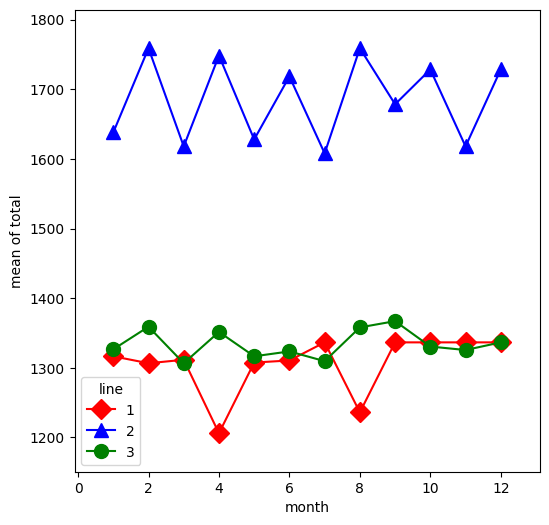

In [80]:
from statsmodels.graphics.factorplots import interaction_plot

line = df_subway["line"]
month = df_subway["month"]
total = df_subway["total"]

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(month, line, total, colors=['red', 'blue', 'green'], markers=['D', '^', 'o'], ms=10, ax=ax) # 변수는 x1, x2 y 순

print('<답안>')
print('먼저, 두 변수의 상호작용에 대한 가설 1을 먼저 검증한다.')
print('두 변수의 상호작용에 대한 F-test 검정통계량은 42.54, p-value 0.000으로 유의수준 0.05 하에서 귀무가설을 기각한다. 지하철 호선과 월 변수 사이에 상호작용이 존재한다.')
print('Interaction plot을 그려 보면, 1호선과 3호선의 월별 승객 수가 교차하는 것을 볼 수 있다.')

참고사이트 
- https://blog.naver.com/clairefromkorea/222938928665
- https://amaruak00.github.io/2022/12/17/adp27th.html
- https://blog.naver.com/dmz04/222938757841

끝. 10페이지